In [8]:
!pip install category_encoders

In [9]:
import pandas as pd
from datetime import datetime
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, plot_confusion_matrix, plot_roc_curve,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 
import matplotlib.pyplot as plt

In [10]:
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 22)

In [11]:
def wrangle(filepath):
    
    col_names =['country', 'year', 'status', 'life_expectancy', 
                'adult_mortality', 'infant_deaths', 'alcohol', 
                'percentage_expenditure', 'hepatitis_b','measles', 
                'bmi', 'under_five_deaths', 'polio','total_expenditure',
                'diphtheria', 'hiv_aids', 'gdp', 'population',
                'thinness_1_19_years', 'thinness_5_9_years',
                'income_composition_of_resources','schooling']
    
    df = pd.read_csv(filepath, header = 0, parse_dates=['year'],
                     names=col_names, index_col = 'year')
    
#     df.drop('hiv_aids', axis=1, inplace=True)
#     df.drop('income_composition_of_resources', axis=1, inplace=True)
#     df.drop('adult_mortality', axis=1, inplace=True)
#     df.drop('schooling', axis=1, inplace=True)
   
    
    #df.drop('country', axis=1, inplace=True)
    
    #df['country'] = float(df['country'])
    
    
    
    
    return df

In [12]:
df = wrangle('https://raw.githubusercontent.com/BakerJr1904/Unit2_Sprint4_BuildWeek/main/life_expectancy_data.csv')

In [13]:
print(df.shape)
df.head(30)

(2938, 21)


,country,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
year,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2014-01-01,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2013-01-01,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2012-01-01,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
2011-01-01,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
2010-01-01,Afghanistan,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
2009-01-01,Afghanistan,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
2008-01-01,Afghanistan,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
2007-01-01,Afghanistan,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2938 entries, 2015-01-01 to 2000-01-01
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   status                           2938 non-null   object 
 2   life_expectancy                  2928 non-null   float64
 3   adult_mortality                  2928 non-null   float64
 4   infant_deaths                    2938 non-null   int64  
 5   alcohol                          2744 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   hepatitis_b                      2385 non-null   float64
 8   measles                          2938 non-null   int64  
 9   bmi                              2904 non-null   float64
 10  under_five_deaths                2938 non-null   int64  
 11  polio                            2919 non-null   float64
 12  to

In [15]:
df.isna().sum()

country                              0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [16]:
target = 'life_expectancy'
y = df[target]
X = df.drop(target, axis=1)

In [17]:
X.shape

(2938, 20)

In [18]:
y.resample('y').sum()

year
2000-12-31    12215.3
2001-12-31    12284.6
2002-12-31    12325.3
2003-12-31    12340.3
2004-12-31    12379.3
2005-12-31    12482.3
2006-12-31    12566.2
2007-12-31    12633.6
2008-12-31    12705.3
2009-12-31    12798.7
2010-12-31    12818.9
2011-12-31    12929.7
2012-12-31    12977.8
2013-12-31    13036.2
2014-12-31    13091.2
2015-12-31    13105.9
Freq: A-DEC, Name: life_expectancy, dtype: float64

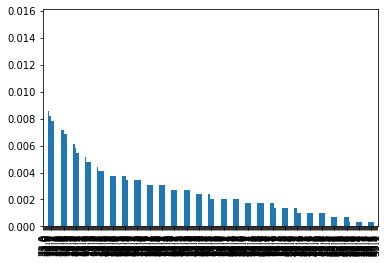

In [19]:
y.value_counts(normalize=True).plot(kind='bar')

In [20]:
#X['country'].hist() 

In [21]:
# Training set
train_mask = X.index.year <= 2009
X_train, y_train = X.loc[train_mask], y.loc[train_mask]

# Validation set
validation_mask = (X.index.year == 2010) | (X.index.year == 2011) | (X.index.year == 2012) 
X_val, y_val = X.loc[validation_mask], y.loc[validation_mask]

# Testing set
test_mask = X.index.year >= 2013
X_test, y_test = X.loc[test_mask], y.loc[test_mask]

In [22]:
X_train.index.value_counts()

2009-01-01    183
2008-01-01    183
2007-01-01    183
2006-01-01    183
2005-01-01    183
2004-01-01    183
2003-01-01    183
2002-01-01    183
2001-01-01    183
2000-01-01    183
Name: year, dtype: int64

In [23]:
X_val.index.value_counts()

2012-01-01    183
2011-01-01    183
2010-01-01    183
Name: year, dtype: int64

In [24]:
X_test.index.value_counts()

2013-01-01    193
2015-01-01    183
2014-01-01    183
Name: year, dtype: int64

In [25]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max() )

Baseline accuracy: 0.017486338797814208


In [26]:
# Model 2: Random Forest
model_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_estimators = 10, max_depth=10, n_jobs=-1, random_state=42)
)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['country', 'status'],
                                mapping=[{'col': 'country',
                                          'data_type': dtype('O'),
                                          'mapping': Afghanistan              1
Albania                  2
Algeria                  3
Angola                   4
Antigua and Barbuda      5
                      ... 
Viet Nam               180
Yemen                  181
Zambia                 182
Zimbabwe               183
NaN                     -2
Length: 184, dtype: int64},
                                         {'col': 'status',
                                          'data_type': dtype('O'),
                                          'mapping': Developing    1
Developed     2
NaN          -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=10, n_estima

In [27]:
print('Training Accuracy (RF):', model_rf.score(X_train, y_train))
print('Validation Accuracy (RF):', model_rf.score(X_val, y_val))

Training Accuracy (RF): 0.9873511224202399
Validation Accuracy (RF): 0.925374607371808


Text(0.5, 0, 'gini importance')

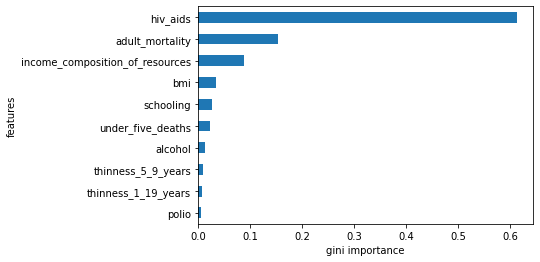

In [28]:
features = model_rf.named_steps['ordinalencoder'].get_feature_names()
gini = model_rf.named_steps['randomforestregressor'].feature_importances_
pd.Series(data=gini, index=features).sort_values(key=abs).tail(10).plot(kind='barh')
plt.ylabel('features')
plt.xlabel('gini importance')